In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from random import randint
import numpy as np
import pandas as pd
import MNIST

In [13]:
x_train_gnb = MNIST.x_train
y_train_gnb = MNIST.y_train
x_test_gnb = MNIST.x_test
y_test_gnb = MNIST.y_test

In [14]:
clf_gnb = GaussianNB()

In [15]:
clf_gnb.fit(x_train_gnb, y_train_gnb)

GaussianNB()

In [16]:
predicted_gnb = clf_gnb.predict(x_test_gnb)
expected_gnb = y_test_gnb

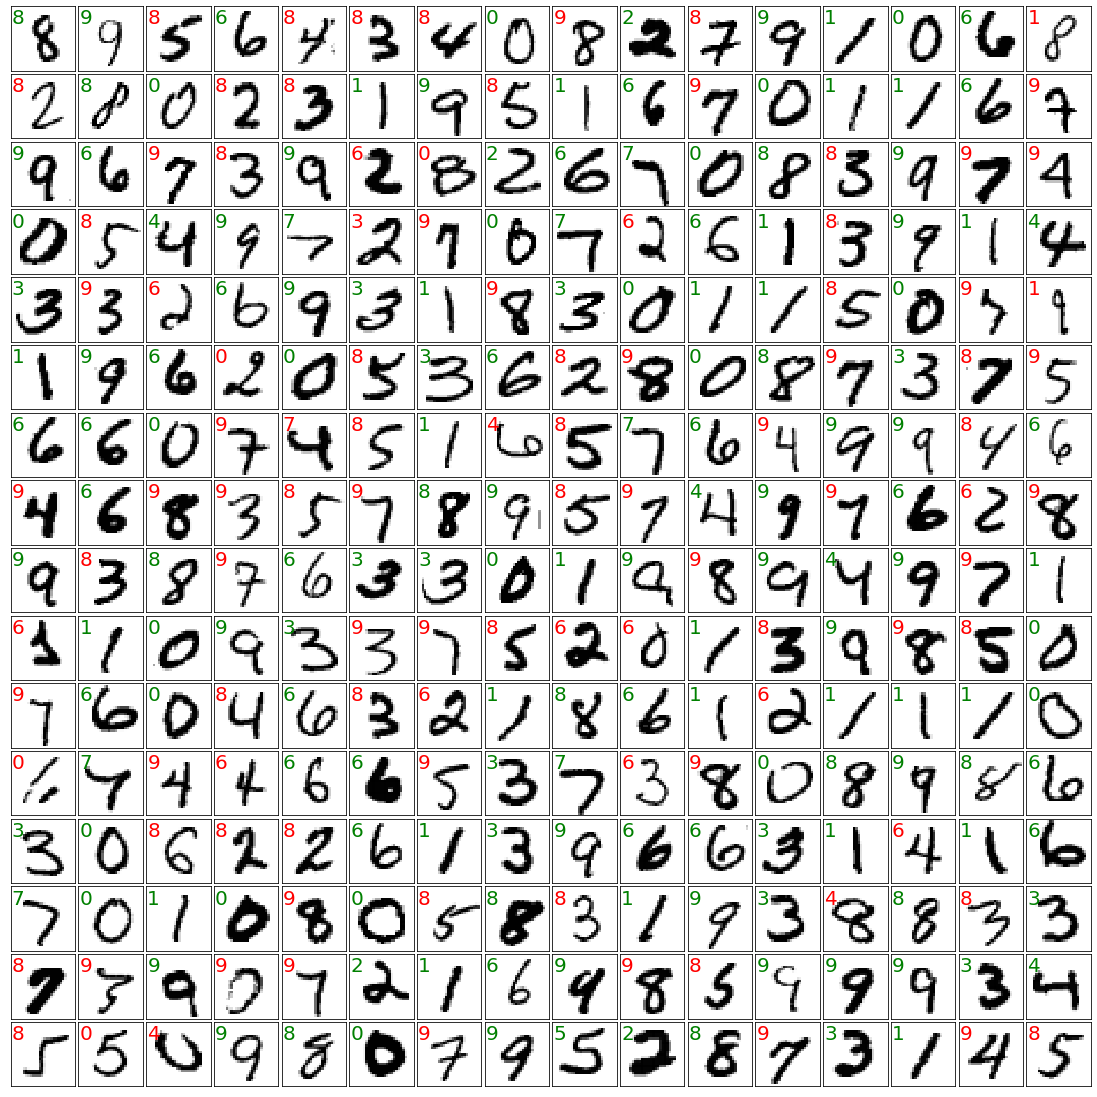

In [17]:
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for j in range(256):
    i = randint(0, len(predicted_gnb) - 1)
    ax = fig.add_subplot(16, 16, j + 1, xticks=[], yticks=[])
    ax.imshow(x_test_gnb.reshape(-1, 28, 28)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    if predicted_gnb[i] == expected_gnb[i]:
        ax.text(0, 7, str(predicted_gnb[i]), fontsize=20, color='green')
    else:
        ax.text(0, 7, str(predicted_gnb[i]), fontsize=20, color='red')
ax.axis("on")
fig.savefig('out.png', dpi=fig.dpi, edgecolor="purple")

In [18]:
print(metrics.classification_report(expected_gnb, predicted_gnb))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.05      0.09       892
           6       0.65      0.93      0.77       958
           7       0.88      0.27      0.42      1028
           8       0.28      0.67      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000



In [19]:
d_gnb = [array for array in metrics.confusion_matrix(expected_gnb, predicted_gnb)]
data_matrix_gnb = {"0": d_gnb[0], "1": d_gnb[1], "2": d_gnb[2], "3": d_gnb[3], "4": d_gnb[4], \
                   "5": d_gnb[5], "6": d_gnb[6], "7": d_gnb[7], "8": d_gnb[8], "9": d_gnb[9]}
df_matrix_gnb = pd.DataFrame(data=data_matrix_gnb)
df_matrix_gnb

,0,1,2,3,4,5,6,7,8,9
0,870,0,79,32,19,71,12,0,13,5
1,0,1079,25,39,2,25,12,15,72,7
2,3,2,266,6,5,1,3,2,3,3
3,5,1,91,353,4,20,1,10,7,6
4,2,0,5,2,168,3,1,5,3,1
5,5,0,2,3,7,44,7,1,11,0
6,31,10,269,51,63,40,895,5,12,1
7,1,0,4,8,7,2,0,280,4,13
8,35,38,271,409,210,586,26,39,648,18
9,28,5,20,107,497,100,1,671,201,955
